<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong>RYANAIR CUSTOMER REVIEW ANALYSIS </strong></span></b> </div> 

 
<img src="ryanair.jpg" alt="Description of the image">

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Business Understanding</span></b> </div>

In the airline industry, customer reviews and surveys play a pivotal role in shaping and enhancing the overall customer experience. Companies, such as RyanAir, routinely conduct follow-ups on specific services based on valuable customer feedback, making necessary improvements to ensure satisfaction.

Customer reviews hold significant influence, often swaying people's decisions to try out a particular airline. These reviews impact critical aspects, including boarding decisions. Recognizing the importance of customer feedback is crucial in a service-oriented industry like aviation, as it not only guides improvements but also contributes to better recommendations and choices in the market.

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Objectives</span></b> </div>
1. Conduct a sentiment analysis of **RyanAir** customer reviews.
2. Identify the most logged complain from clients.
3. Assess passenger classes to determine which class receives the highest number of complaints and, conversely, the highest appreciation.  

### <b> <span style='color:#16C2D5'>|</span>Potential Challenges</b> 
1. Small amount of data. 
2. High number of missing values. 
3. Less informartion about boarding classes. 

### <b> <span style='color:#16C2D5'>|</span> Importing libraries</b> 
For easier data manipulation, visualization, sentiment analysis and topic modelling, the followig libraries are essential to be successfull with the task at hand namely:
* **pyLDAvis** and **gensim** for topic modelling.
* **Vader** for Sentiment analysis.
* **NLTK** for text analysis. 
* **Requests** and **BeautifulSoup** for scraping reviews. 

In [34]:
from bs4 import BeautifulSoup 
import pandas as pd 
import numpy as np 
import requests 
import re 

# Visualization libraries. 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

# Text analysis libraries. 
import nltk 
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer  
from nltk.tokenize import word_tokenize
import string 
from sklearn.feature_extraction.text import TfidfVectorizer   

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Topic modelling libraries.
from pprint import pprint 
import pyLDAvis.gensim_models 
import gensim 
from gensim.utils import simple_preprocess 
from pyLDAvis import gensim 
from gensim import corpora, models   

import warnings

### <b> <span style='color:#16C2D5'>|</span> Scraping reviews</b> 

To get **RYANAIR** reviews, scraping has to be done. The reviews are hosted on the **Skytrax** website. This is made possible by the **BeautifulSoup** and **Request** libraries. It is also necessary to include the pagination of the results because each page has 20 reviews and 2000 reviews are needed. 

After scraping the reiews, it is also reccommended to store the data in a dataframe and later export it to a **CSV file** for easier data retrieval and modelling purposes. 

In [2]:
# Scrape the reviews from skytrax website 
base_url = "https://www.airlinequality.com/airline-reviews/ryanair"
pages = 20 
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [5]:
# Save the reviews to a pandas dataframe and later to a CSV file. 
df = pd.DataFrame(reviews)
df.to_csv("ryan_reviews.csv")

In [3]:
df2 = pd.read_csv("ryan_reviews.csv")
df2.head()

,Unnamed: 0,0
0,0,✅ Trip Verified | Really impressed! You get wh...
1,1,✅ Trip Verified | I should like to review my ...
2,2,✅ Trip Verified | Flight left the gate ahead o...
3,3,Not Verified | Booked a fight from Copenhagen ...
4,4,Not Verified | The flight itself is operated ...


In [4]:
df2.rename(columns={'0':'air_reviews'}, inplace=True)
df2.drop(columns=['Unnamed: 0'], inplace=True) 

Split the data to exclude the verification details of the trip. This helps to only remain with the airlin ereviews on which sentiment analysis and topic modelling is to be performed. 

In [5]:
# Split the data to only include the review 
df2['air_reviews'] = df2['air_reviews'].str.split('|',expand=True)[1]

In [6]:
# Drop null values. 
df2.dropna(inplace=True)

In [7]:
# Function to clean up text and make it ready for topic modelling. 
def clean_text(text):
    """
    Function to clean up the text by lowercasing,
    removing the dates and any other numbers present.
    It also tokenizes the words and vectorizes them for modellng        
    Parameters
    
    """
    # Lowercase the text
    text = text.lower() 
    # Remove the punctuations 
    text = re.sub(r'[^\w\s]', '', text) 
    # Remove the dates  
    text = re.sub(r'\b\d{1,2}[/-]\d{1,2}[/-]\d{4}\b', '', text)
    # remove any numbers 
    text = re.sub(r'\d+', '', text)        
    
    return text    

In [8]:
df2['air_reviews'] = df2['air_reviews'].apply(clean_text)

In [9]:
df2

,air_reviews
0,really impressed you get what you pay for thi...
1,i should like to review my flight from faro ...
2,flight left the gate ahead of schedule fare w...
3,booked a fight from copenhagen to poland thou...
4,the flight itself is operated by malta air a...
...,...
1364,i flew ryanair from london luton to malta in...
1365,first flight from athens to thessaloniki ful...
1366,gladub day return tickets a bargain at for ...
1367,seville to dublin with ryanair loud creaking...


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Sentiment analysis</span></b> </div>

After preprocessing by removing all numericals and lowercasing the data, the data is now ready for modelling purposes. Starting off with the **Sentiment analysis**, polarity scores are usually generated with the compound score denoting the overall score of the sentiment. 

In [10]:
# Initialize the sentiment analyzer and get their respective polarity scores. 
st_analyze = SentimentIntensityAnalyzer()

sentiments = []

for row in df2['air_reviews']:
    r = st_analyze.polarity_scores(row)
    sentiments.append(r)


df3 = pd.DataFrame(sentiments)
df3

,neg,neu,pos,compound
0,0.067,0.715,0.218,0.8455
1,0.047,0.888,0.065,0.5605
2,0.000,0.780,0.220,0.8402
3,0.097,0.880,0.023,-0.9110
4,0.116,0.759,0.125,0.5172
...,...,...,...,...
1298,0.039,0.917,0.044,0.0772
1299,0.023,0.921,0.056,0.5854
1300,0.032,0.852,0.116,0.9339
1301,0.075,0.883,0.043,-0.6124


In [11]:
df_final = pd.concat([df2.reset_index(drop=True), df3], axis=1)

In [12]:
# Function to categorize the sentiments into positive, negative and neutral. 
def categorize_sentiment(data):
    if data['compound'] > 0:
        return "positive"
    elif data['compound'] < 0:
        return "negative"
    else:
        return "neutral"

In [13]:
df_final['sentiment'] = df_final.apply(categorize_sentiment, axis=1)

In [14]:
df_final

,air_reviews,neg,neu,pos,compound,sentiment
0,really impressed you get what you pay for thi...,0.067,0.715,0.218,0.8455,positive
1,i should like to review my flight from faro ...,0.047,0.888,0.065,0.5605,positive
2,flight left the gate ahead of schedule fare w...,0.000,0.780,0.220,0.8402,positive
3,booked a fight from copenhagen to poland thou...,0.097,0.880,0.023,-0.9110,negative
4,the flight itself is operated by malta air a...,0.116,0.759,0.125,0.5172,positive
...,...,...,...,...,...,...
1298,i flew ryanair from london luton to malta in...,0.039,0.917,0.044,0.0772,positive
1299,first flight from athens to thessaloniki ful...,0.023,0.921,0.056,0.5854,positive
1300,gladub day return tickets a bargain at for ...,0.032,0.852,0.116,0.9339,positive
1301,seville to dublin with ryanair loud creaking...,0.075,0.883,0.043,-0.6124,negative


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

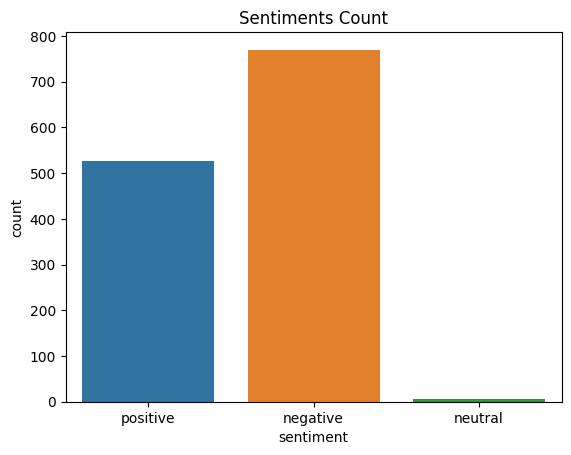

In [15]:
# Plot the counts of various sentiments.     
sns.countplot(data=df_final, x='sentiment')
plt.title("Sentiments Count")
plt.show()

From the **Sentiment analysis**, it is clear that the number of ngative sentiments exceeds the positive sentiments by almost 230. The number of neutral sentiments is way much less than the postives or negatives. 

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Topic modelling</span></b> </div>

**Topic Modelling** is a form of **Natural Language Processing** where words or phrase patterns are recognized from topics present in the document or review. These phrase patterns are later clustered into word groups and similar expressions thta best characterize a set of documents. 

To do the topic modelling, stopwords have to be removed as they may affect the kind of topics under investigation. 

This process will eventually help in identifying which sectors of the airline needs improvement. This will eventually help in adressing objective 2. The areas that need improvements will be passed on to the necessary stakeholders and shareholders for further action. 

In [29]:
text_list = df_final['air_reviews']

In [30]:
# Remove all English stopwords. 
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

text_list_fin = text_list.apply(lambda x: remove_stopwords(x)) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# Create tokens for every word in the text. 
import gensim.corpora as corpora 
tokens = [word for word in text_list_fin.str.split()]
dict = corpora.Dictionary(tokens)

corpus = [dict.doc2bow(text) for text in tokens]

In [37]:
# Instantiate the topic modelling process.   
from gensim.models import LdaModel    

elda_model = LdaModel(corpus=corpus, id2word=dict, num_topics=7, random_state=42, chunksize=1000, passes=50, iterations=100)

elda_model.print_topics()

[(0,
  '0.022*"flight" + 0.019*"ryanair" + 0.014*"crew" + 0.014*"time" + 0.013*"cabin" + 0.011*"boarding" + 0.010*"seats" + 0.009*"seat" + 0.009*"plane" + 0.008*"priority"'),
 (1,
  '0.018*"flight" + 0.018*"ryanair" + 0.016*"check" + 0.014*"airport" + 0.011*"us" + 0.011*"boarding" + 0.009*"time" + 0.009*"pay" + 0.008*"get" + 0.008*"airline"'),
 (2,
  '0.031*"flight" + 0.021*"ryanair" + 0.010*"service" + 0.009*"customer" + 0.008*"hours" + 0.008*"us" + 0.007*"never" + 0.007*"staff" + 0.007*"airline" + 0.006*"would"'),
 (3,
  '0.009*"car" + 0.009*"barcode" + 0.007*"hire" + 0.006*"mobile" + 0.005*"ryanairs" + 0.005*"printing" + 0.005*"printed" + 0.005*"passes" + 0.004*"far" + 0.004*"nickel"'),
 (4,
  '0.020*"pay" + 0.019*"seats" + 0.014*"ryanair" + 0.011*"bag" + 0.011*"extra" + 0.010*"seat" + 0.010*"luggage" + 0.010*"airline" + 0.009*"sit" + 0.008*"next"'),
 (5,
  '0.026*"flight" + 0.014*"ryanair" + 0.012*"crew" + 0.008*"minutes" + 0.007*"cabin" + 0.007*"flew" + 0.006*"dublin" + 0.006*"gre

In [38]:
# Visualize the topics under investigation. 
from pyLDAvis import gensim 
pyLDAvis.enable_notebook()
viz = pyLDAvis.gensim.prepare(elda_model, corpus, dict)
viz 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.133302 -0.017687       1        1  30.779408
2     -0.099154 -0.029867       2        1  26.006412
0     -0.106325  0.130000       3        1  23.169941
4     -0.071258 -0.078466       4        1   8.539441
6      0.038311 -0.155483       5        1   5.712617
5      0.108537  0.200483       6        1   5.084462
3      0.263191 -0.048980       7        1   0.707718, topic_info=         Term         Freq        Total Category  logprob  loglift
10     flight  1762.000000  1762.000000  Default  30.0000  30.0000
39       crew   333.000000   333.000000  Default  29.0000  29.0000
21      seats   375.000000   375.000000  Default  28.0000  28.0000
18        pay   533.000000   533.000000  Default  27.0000  27.0000
121     check   537.000000   537.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
293   problem     2.098480   101.372526   Topic7  -5.6391   1.0733
94        use     1.850791   145.489583   Topic7  -5.7647   0.5864
27        app     1.720052    55.535090   Topic7  -5.8379   1.4762
33   boarding     1.796154   531.453897   Topic7  -5.7946  -0.7391
486    return     1.536747   176.179929   Topic7  -5.9506   0.2090

[535 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4454      5  0.822581   abroad
6395      6  0.496213   absent
6395      7  0.496213   absent
5361      7  0.538639   accent
1184      2  0.980392  account
...     ...       ...      ...
360       4  0.099724    would
360       5  0.021679    would
360       6  0.019511    would
3357      1  0.940091        x
2659      2  0.969636     zero

[957 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 5, 7, 6, 4])

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Conclusion</span></b> </div>

The stopwords were only removed during the topic modelling phase and not sentiment analysis phase because the sentiment or origanl feeling of the reviews may be distorted without stop words. 

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Reccommendations</span></b> </div>

1. The number of **negative reviews** is much more than the number of **positive reviews**. 

2. The areas that need to be adressed are:
* Flight
* Check-ins
* Boarding
* Time taken to board.
* The payment options.
* The staff.
* Service of the plane. 